In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
# get data

df = pd.read_csv("myfile.csv")
df.head(5)

,index,id,name,type,tags,kind,billing_account_id,effective_price,pricing_model,billing_account_name,...,exchange_rate_pricing_to_billing,payg_cost_in_billing_currency,payg_cost_in_usd,partner_earned_credit_rate,partner_earned_credit_applied,pay_g_price,benefit_id,benefit_name,provider,cost_allocation_rule_name
0,0,/subscriptions/53e29f21-25fa-431a-9746-551b0db...,1eb6f86b-e15f-e49c-9f70-bb0efb2b5929,Microsoft.Consumption/usageDetails,"{'application': None, 'databricks-environment'...",modern,7c3f9612-634e-51f8-a7b7-1c7cff3311c3,0.0,OnDemand,Thor Jarle,...,0.0,0.000014,0.000001,0.0,NaN,0.004730,NaN,NaN,NaN,NaN
1,1,/subscriptions/53e29f21-25fa-431a-9746-551b0db...,c6be3d1b-37b9-7dd9-405b-b06e27194cd4,Microsoft.Consumption/usageDetails,"{'application': None, 'databricks-environment'...",modern,7c3f9612-634e-51f8-a7b7-1c7cff3311c3,0.0,OnDemand,Thor Jarle,...,0.0,0.000057,0.000006,0.0,NaN,0.059400,NaN,NaN,NaN,NaN
2,2,/subscriptions/53e29f21-25fa-431a-9746-551b0db...,0e59ff9e-c5f1-9af6-d891-2f45bb5dc9dc,Microsoft.Consumption/usageDetails,"{'application': None, 'databricks-environment'...",modern,7c3f9612-634e-51f8-a7b7-1c7cff3311c3,0.0,OnDemand,Thor Jarle,...,0.0,0.000041,0.000004,0.0,NaN,0.049500,NaN,NaN,NaN,NaN
3,3,/subscriptions/53e29f21-25fa-431a-9746-551b0db...,a10f2eac-511d-8576-9f01-bbc150b2933d,Microsoft.Consumption/usageDetails,"{'application': None, 'databricks-environment'...",modern,7c3f9612-634e-51f8-a7b7-1c7cff3311c3,0.0,OnDemand,Thor Jarle,...,0.0,0.004069,0.000420,0.0,NaN,0.049500,NaN,NaN,NaN,NaN
4,4,/subscriptions/53e29f21-25fa-431a-9746-551b0db...,8547ce0e-1e7f-30fd-2e56-6ea7ec37be56,Microsoft.Consumption/usageDetails,"{'application': None, 'databricks-environment'...",modern,7c3f9612-634e-51f8-a7b7-1c7cff3311c3,0.0,OnDemand,Thor Jarle,...,0.0,0.000040,0.000004,0.0,NaN,0.000396,NaN,NaN,NaN,NaN


In [24]:
df.columns

Index(['index', 'id', 'name', 'type', 'tags', 'kind', 'billing_account_id',
       'effective_price', 'pricing_model', 'billing_account_name',
       'billing_period_start_date', 'billing_period_end_date',
       'billing_profile_id', 'billing_profile_name', 'subscription_guid',
       'subscription_name', 'date', 'product', 'meter_id', 'meter_name',
       'meter_region', 'meter_category', 'meter_sub_category',
       'service_family', 'quantity', 'unit_of_measure', 'instance_name',
       'cost_in_usd', 'unit_price', 'billing_currency_code',
       'resource_location', 'consumed_service', 'service_info1',
       'service_info2', 'additional_info', 'invoice_section_id',
       'invoice_section_name', 'cost_center', 'resource_group',
       'reservation_id', 'reservation_name', 'product_order_id',
       'product_order_name', 'is_azure_credit_eligible', 'term',
       'publisher_name', 'publisher_type', 'charge_type', 'frequency',
       'cost_in_billing_currency', 'cost_in_pricing_cur

In [25]:
df = df[['quantity','meter_category','unit_price','resource_group']]
df.columns

Index(['quantity', 'meter_category', 'unit_price', 'resource_group'], dtype='object')

In [26]:
df['Amount'] = df.quantity * df.unit_price
df.head(5)

,quantity,meter_category,unit_price,resource_group,Amount
0,0.000300,Storage,0.004730,data-dev-rg,0.000001
1,0.000100,Storage,0.059400,TestLab-RG,0.000006
2,0.000085,Storage,0.049500,data-stg-rg,0.000004
3,0.008494,Storage,0.049500,TestLab-RG,0.000420
4,0.010400,Storage,0.000396,data-dev-rg,0.000004


In [27]:
df = df[['resource_group','Amount']]
df.head(5)

,resource_group,Amount
0,data-dev-rg,0.000001
1,TestLab-RG,0.000006
2,data-stg-rg,0.000004
3,TestLab-RG,0.000420
4,data-dev-rg,0.000004


In [29]:
# Apply the default theme
sns.set_theme()

<AxesSubplot:xlabel='resource_group', ylabel='Amount'>

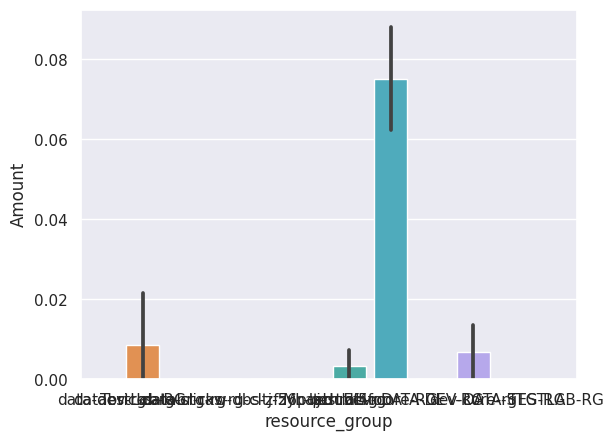

In [35]:
# Create a visualization
plt.xticks(rotation=45)
sns.barplot(data=df, x="resource_group", y="Amount")